In [17]:
import matplotlib.pyplot as plt
#import for graph

In [18]:
with open('datasetq2.csv', 'r') as f: #read the file and store results 
    results = [line.strip("\n") for line in f]
    f.close()
    
data = results[1:] #remove f1 f2 label

f1 = [int(i[0:2]) for i in data]
f2 = [int(j[3:]) for j in data]
#x and y 

print(f1)
print(f2)

#unsupervised learning k means clustering algorithm
#data has n = 30 features = 2 

df = { 'f1' : f1,
'f2' : f2
}

[25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38, 43, 51, 46]
[79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 20, 5, 29, 27, 8, 7]


(0, 69.25985663082439)

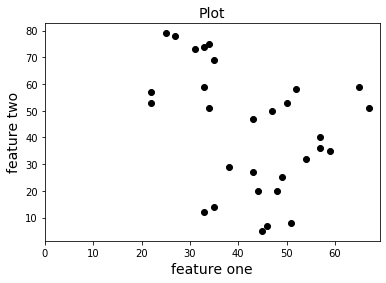

In [19]:
###A: Plot data###

plt.scatter(f1,f2, color = 'k')
plt.xlabel("feature one", fontsize= 14) #changing the axis
plt.ylabel("feature two", fontsize= 14)
plt.title("Plot",fontsize=14)
plt.xlim(0)


In [20]:
"""
Square root function
"""

def squareroot(number):
    return number ** 0.5


In [21]:
"""
Assign points to correct labels based of Euclidean distance

Input:
    - Dataset ~df
    - List of Centroids~centroids
Output:
    - List of labeled coordinates~labels
"""
def assignment(df, centroids):
    new = {}
    counter = 0
    which_one = [] #this will be an array of indices of which centroid is closest
    labels ={} #new labels
    hard_count = len(centroids.keys()) #wanted the size of how many keys
    
    #first loop
    for key in centroids.keys():
        #to create general dict for euclidean distances
        new['distance_from_{}'.format(key)] = []
        point = centroids.get(key)
        
        for index in range(len(df.get('f1'))):
            
            new["distance_from_{}".format(key)].append(squareroot(((df.get('f1')[index] - point[0])**2) + ((df.get('f2')[index] - point[1])**2)))
            #this returns the dictionary for all the distances 

    #comparing all into an array to find the index of the minimum distance 
    for l in range(len(df.get('f1'))):
            
        temp = []
        
        for c in range(1,hard_count + 1):
           
            temp.append(new.get("distance_from_{}".format(c))[l])
        
        which_one.append(temp.index(min(temp))) #gets which one is closest to the centroid
               
    for key_num in range(1, hard_count+1):
        labels[(key_num)] = []
        
    for value in which_one:
        
        labels.get((value+1)).append([df.get('f1')[counter],df.get('f2')[counter]])
        counter += 1
        
    return labels #return the dictionary which has the points in whichever centroid
        
   


In [22]:
"""
Calculate new centroid

Input:
    - Dataset~df
    - List of labeled coordinates~labels
Output:
    - Returns new set of centroid~new_centroids
"""
def reassign_centroids(df, labels):
    
    new_centroids = {}#new centroid list
   
    for i in range(1,k_copy +1):
        #k copy was passed from inside our main function
        a= labels.get(i)
        
        x = 0
      
        y=0
        for element in a:
            
            x += element[0]
            y += element[1]
        
        new_centroids[i]= [round(x/len(a)),round(y/len(a))] #we are averaging all the points and rounding it
        #rounding the points
    
    
    #put back into dictionary for convience
    
   
    
    return new_centroids
    
#new_centroids =reassign_centroids(df,labels)
#print(df)
#print(new_centroids)
#print(labels)

In [23]:
"""
K means clustering Algorithm works for K clusters

Input: 
    - Dataset ~df 
    - Cluster Size ~k
Output:
    - Returns labels and new centroids
"""
def kmeans(df, k):
    global k_copy #since we are not passing k into other functions, create a global copy
    k_copy = k #will be useful to use as loop iteration counters
    
    ##########Step 1: Choose the first k points as centroid##########
    centroids = {
    i+1: [df.get('f1')[i], df.get('f2')[i]]
    for i in range(k)
}
    
    ##########Step 2: Assignment##########
    
    labels = assignment(df, centroids) #assigns each point to a label
    
    
    print("Initial labels" + str(labels))
    
    
    ##########Step 3: Reassign centroids using cluster average########## 
    
    new_centroids=reassign_centroids(df, labels)
    
    
    #repeating until convergence
    check = True
    curr = new_centroids.get(1)
    while (check):
        
        labels = assignment(df, new_centroids)
        new_centroids = reassign_centroids(new_centroids,labels)
        late = new_centroids.get(1)
        print(curr)
        print(late)
        if curr == late:
            check = False
        else:
            curr = late
        print("new centroids" + str(new_centroids))
        
    
    return labels, new_centroids, centroids



Initial labels{1: [[25, 79], [27, 78], [33, 74], [31, 73], [35, 69], [34, 75]], 2: [[34, 51], [22, 53], [33, 59], [22, 57], [67, 51], [54, 32], [57, 40], [43, 47], [50, 53], [57, 36], [59, 35], [52, 58], [65, 59], [47, 50], [49, 25], [48, 20], [35, 14], [33, 12], [44, 20], [45, 5], [38, 29], [43, 27], [51, 8], [46, 7]]}
[31, 75]
[29, 69]
new centroids{1: [29, 69], 2: [48, 32]}
[29, 69]
[32, 66]
new centroids{1: [32, 66], 2: [49, 30]}
[32, 66]
[33, 65]
new centroids{1: [33, 65], 2: [49, 29]}
[33, 65]
[36, 63]
new centroids{1: [36, 63], 2: [48, 26]}
[36, 63]
[37, 62]
new centroids{1: [37, 62], 2: [48, 24]}
[37, 62]
[39, 62]
new centroids{1: [39, 62], 2: [47, 22]}
[39, 62]
[39, 62]
new centroids{1: [39, 62], 2: [47, 22]}
Initial Centroids: 
{1: [25, 79], 2: [34, 51]}
Final Centroids: 
{1: [39, 62], 2: [47, 22]}


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(0, 69.26182795698925)

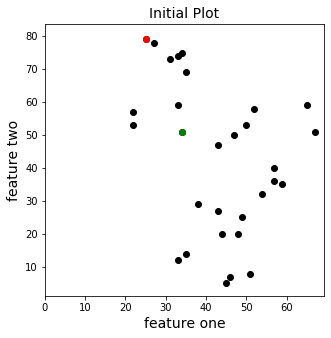

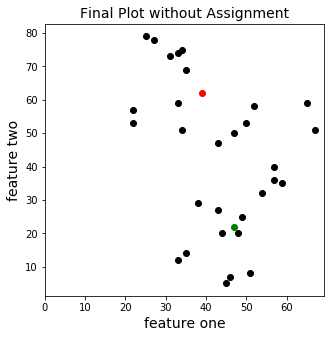

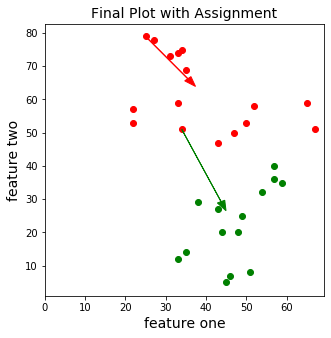

In [24]:
labels, new_centroids, centroids = kmeans(df,2)
#call function


###Initial Plot with Centroid###
print("Initial Centroids: " )
print(centroids)

print("Final Centroids: " )
print(new_centroids)
fig = plt.figure(figsize=(5, 5))
plt.scatter(f1, f2, color='k')
plt.xlabel("feature one", fontsize= 14)
plt.ylabel("feature two", fontsize= 14)
plt.title("Initial Plot",fontsize=14)
plt.xlim(0)
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
    
    
###Final Plot with Centroids WITHOUT assignment###    
fig = plt.figure(figsize=(5, 5))
plt.scatter(f1, f2, color='k')
plt.xlabel("feature one", fontsize= 14)
plt.ylabel("feature two", fontsize= 14)
plt.title("Final Plot without Assignment",fontsize=14)
plt.xlim(0)
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in new_centroids.keys():
    plt.scatter(*new_centroids[i], color=colmap[i])
    
    

    
###Final Plot with Centroids WITH assignment### 
only_test = []
only_test_2 = []

only_test_3 = []
only_test_4 = []
    
only_test_5 =[]
only_test_6 = []
for i in labels.get(1):
    only_test.append(i[0])
    only_test_2.append(i[1])
for i in labels.get(2):
    only_test_3.append(i[0])
    only_test_4.append(i[1])
 

fig = plt.figure(figsize=(5, 5))
plt.scatter(only_test,only_test_2, color = 'r')
plt.scatter(only_test_3,only_test_4, color = 'g')
ax = plt.axes()


for i in new_centroids.keys():
    old_x = centroids.get(i)[0]
    old_y = centroids.get(i)[1]
    dx = (new_centroids.get(i)[0] - centroids.get(i)[0]) * 0.75
    dy = (new_centroids.get(i)[1] - centroids.get(i)[1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])


plt.xlabel("feature one", fontsize= 14)
plt.ylabel("feature two", fontsize= 14)
plt.title("Final Plot with Assignment",fontsize=14)
plt.xlim(0)

In [25]:
cluster_one = len(labels.get(1))
print(cluster_one)
cluster_two = len(labels.get(2))
print(cluster_two)

16
14


Cluster size with label 1 is 16

Cluster size with label 2 is 14


The final centroids are {1: [39, 62], 2: [47, 22]}